In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,7)})

In [64]:
import pandas as pd
import os
import datetime
from tqdm.notebook import tqdm as tqdm_notebook
#import mmh3
import seaborn as sns

from sqlalchemy import create_engine

from clickhouse_sqlalchemy import make_session
from urllib.parse import quote

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [119]:
clasterisation_regional_centers = pd.read_excel('C:/Users/a.al.kosheleva/analytics/kosheleva_a/files/clasterisation_regional_centers_2023_fin.xlsx') 

In [120]:
clasterisation_regional_centers.head()

,city,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,spontaneous_knowledge,suggested_knowledge,buyers_lenta_online
0,Архангельск,1098.57,1.30,2081.345501,0.24,8.170692,0.004053,175.490909,276.905991,18.3,45.2,5333.0
1,Астрахань,945.45,3.29,2018.535350,0.25,8.223889,0.004685,160.440449,59.702128,14.0,66.8,8025.0
2,Барнаул,776.74,2.55,1980.886064,0.20,8.181684,0.007959,163.235450,61.983897,30.8,69.9,11340.0
3,Белгород,861.19,3.37,2030.234519,0.23,8.314815,0.004243,121.022333,81.328647,42.1,69.7,7120.0
4,Брянск,889.71,3.56,2058.820287,0.18,8.247692,0.005432,138.443798,85.824225,24.2,63.9,5758.0


In [121]:
clasterisation_regional_centers.dtypes

city                                 object
avg_check_e_commerce                float64
e_com_share_value_percent           float64
avg_check_lenta_online              float64
brand_share_value_percent           float64
nps_lenta_online                    float64
brand_share_region_yandex_search    float64
affinity_index_lo                   float64
affinity_index_delivery             float64
spontaneous_knowledge               float64
suggested_knowledge                 float64
buyers_lenta_online                 float64
dtype: object

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


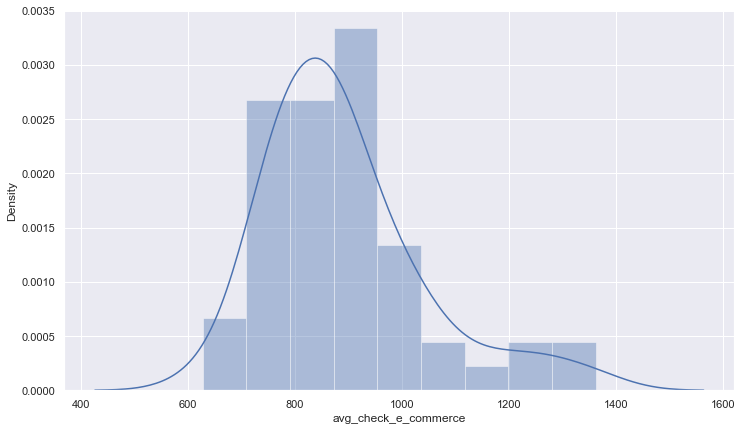

In [122]:
ax = sns.distplot(clasterisation_regional_centers.avg_check_e_commerce)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


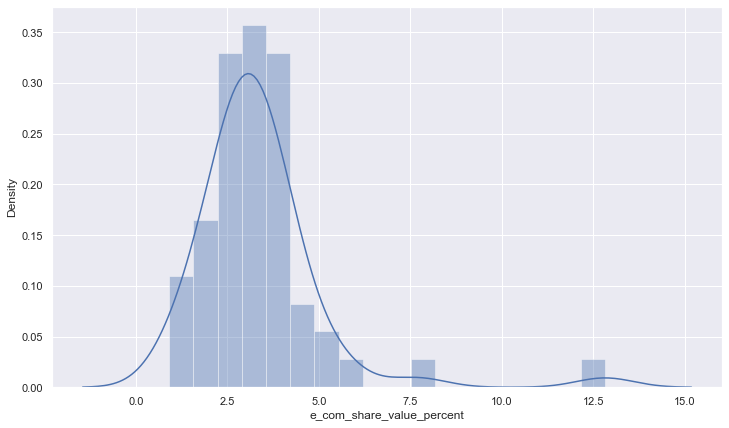

In [123]:
ax = sns.distplot(clasterisation_regional_centers.e_com_share_value_percent)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


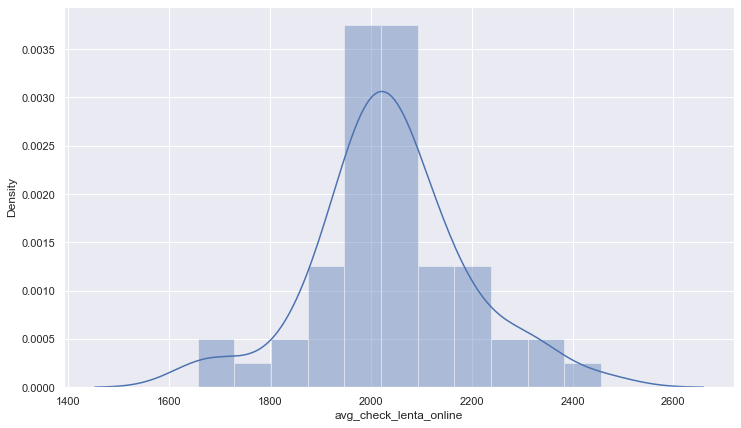

In [124]:
ax = sns.distplot(clasterisation_regional_centers.avg_check_lenta_online)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


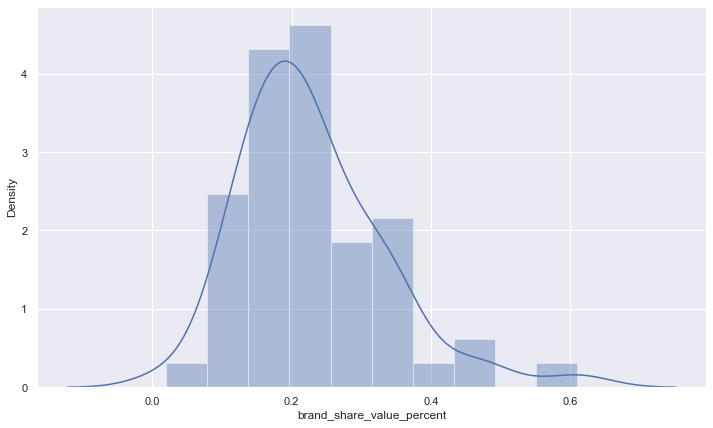

In [125]:
ax = sns.distplot(clasterisation_regional_centers.brand_share_value_percent)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


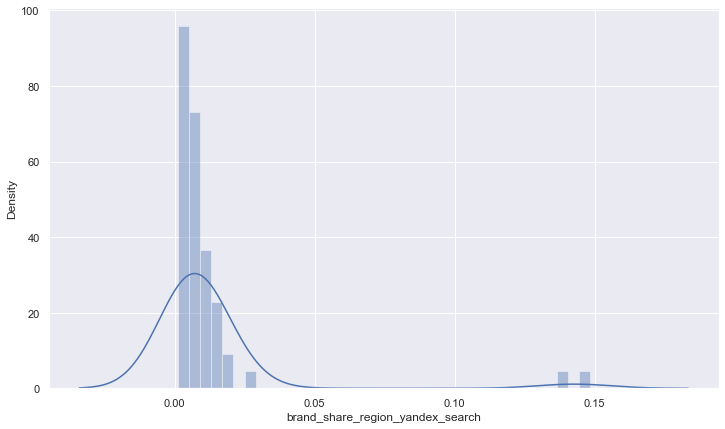

In [126]:
ax = sns.distplot(clasterisation_regional_centers.brand_share_region_yandex_search)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


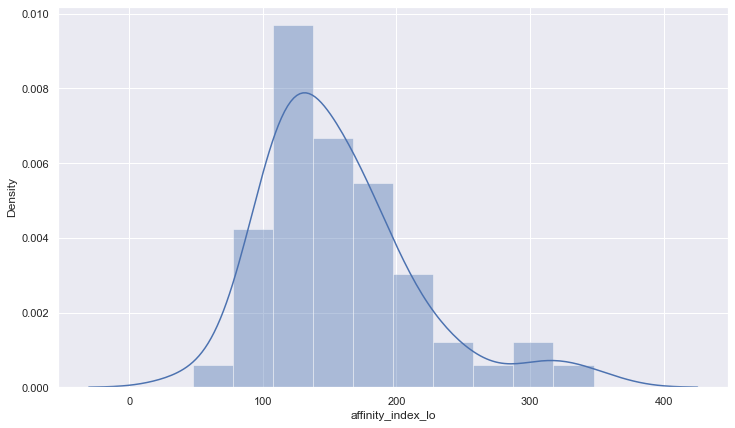

In [127]:
ax = sns.distplot(clasterisation_regional_centers.affinity_index_lo)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


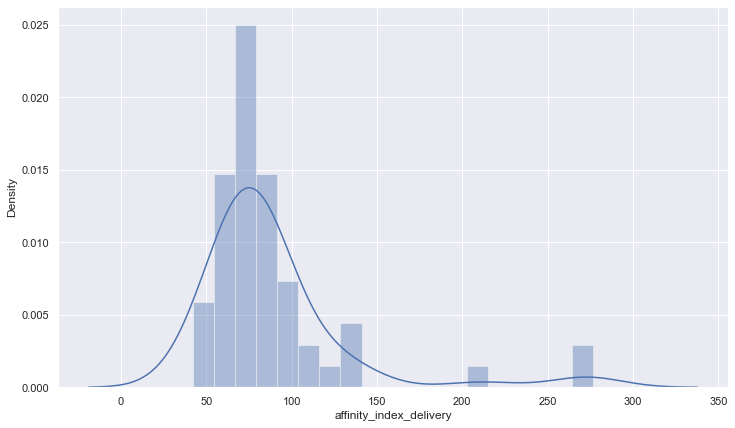

In [128]:
ax = sns.distplot(clasterisation_regional_centers.affinity_index_delivery)

In [129]:
#у части данных есть хвосты, так что лучше все прологарифмировать

In [130]:
column_headers = list(clasterisation_regional_centers.columns.values)

In [131]:
column_headers

['city',
 'avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'spontaneous_knowledge',
 'suggested_knowledge',
 'buyers_lenta_online']

In [132]:
# преобразуем датафрэйм для кластеризации (убираем тяжелые хвосты в метриках)
def get_log_df(data):
    def log_transform(v): 
        res = np.log(v+1)
        return res
    
    data_tmp = data.copy()
    for el in ['avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'spontaneous_knowledge',
 'suggested_knowledge']:
        data_tmp[el] = data_tmp[el].apply(lambda x: log_transform(x))
    return data_tmp[['avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'spontaneous_knowledge',
 'suggested_knowledge']]

In [133]:
df_log = get_log_df(clasterisation_regional_centers.copy())

In [134]:
df_log.head()

,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,spontaneous_knowledge,suggested_knowledge
0,7.002674,0.832909,7.641250,0.215111,2.216013,0.004045,5.173269,5.627283,2.960105,3.832980
1,6.852718,1.456287,7.610623,0.223144,2.221797,0.004674,5.084136,4.105979,2.708050,4.216562
2,6.656392,1.266948,7.591804,0.182322,2.217211,0.007928,5.101301,4.142879,3.459466,4.261270
3,6.759476,1.474763,7.616399,0.207014,2.231606,0.004234,4.804204,4.410719,3.763523,4.258446
4,6.792019,1.517323,7.630374,0.165514,2.224374,0.005418,4.937662,4.463886,3.226844,4.172848


In [135]:
from sklearn.preprocessing import MinMaxScaler

### МинМакс скалирование

In [136]:
#нормализуем данные, приведем к одной шкале
df_log_sc = MinMaxScaler().fit_transform(df_log)

In [137]:
df_log_sc.shape

(55, 10)

In [138]:
df_log_sc_clmns = pd.DataFrame(df_log_sc)

In [139]:
df_log_sc_clmns.columns = df_log.columns

In [140]:
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.manifold import TSNE

### Сохраняем tSNE отображение

In [141]:
tsne_representation = TSNE(n_components=2, random_state=3).fit_transform(df_log_sc)

In [142]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [143]:
distance_matrix = linkage(tsne_representation, method = 'ward', metric = 'euclidean')

In [144]:
from scipy.cluster.hierarchy import dendrogram

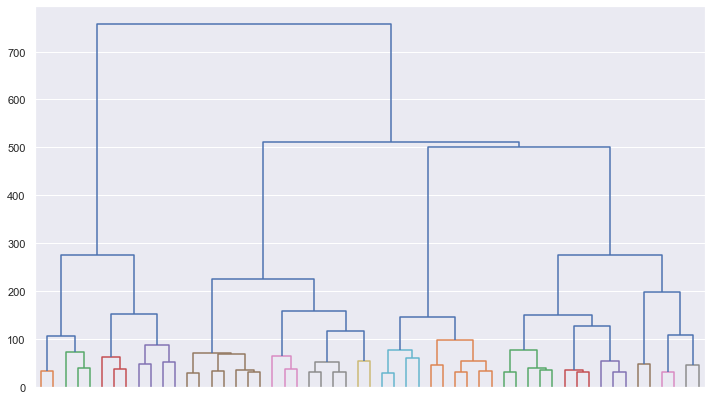

In [145]:
dn = dendrogram(
        distance_matrix,
        leaf_rotation=90.,
        leaf_font_size=8.,
        truncate_mode='level',
        p=16,
        color_threshold=100,
        no_labels=True
    )

In [213]:
#итого было выбрано взять 5 кластеров, далее будет график и подсчет средних значений
cl_tsne_labels_final = pd.Series(fcluster(distance_matrix, 4, criterion='maxclust'))

In [214]:
cl_tsne_labels_final_agg = cl_tsne_labels_final

In [215]:
clusters_df = pd.DataFrame({
    'cl_tsne_labels_final':cl_tsne_labels_final,
    'cl_tsne_labels_final_agg':cl_tsne_labels_final,
    'x':tsne_representation[:,0],
    'y':tsne_representation[:,1]
}
)

In [216]:
import matplotlib.cm as cm
def get_clusters_image(l):
    clusters_df = pd.DataFrame({
        'cl_tsne_labels_final_agg':l,
        'x':tsne_representation[:,0],
        'y':tsne_representation[:,1]
    }
    )
    colors = cm.rainbow(np.linspace(0,1,len(set(l))))
    for y, c in zip(set(l), colors):
        plt.scatter(tsne_representation[pd.Series(l).values==y, 0], 
                    tsne_representation[pd.Series(l).values==y, 1], c=c, alpha=0.3, label=str(y))
    return plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

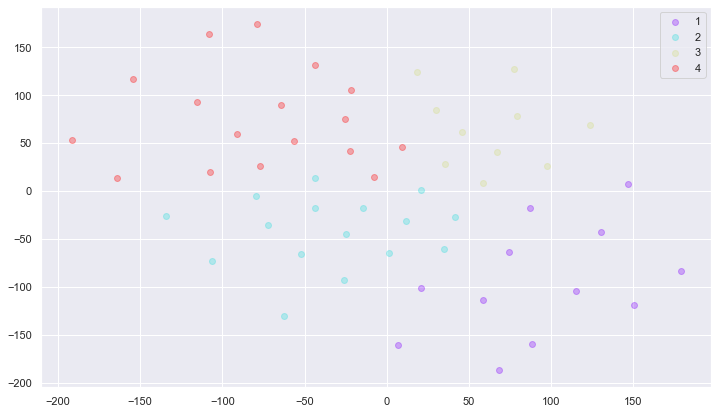

In [217]:
get_clusters_image(cl_tsne_labels_final_agg)

In [218]:
clasterisation_regional_centers["labels_5"] = cl_tsne_labels_final_agg

In [219]:
clasterisation_regional_centers.head()

,city,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,spontaneous_knowledge,suggested_knowledge,buyers_lenta_online,labels_5
0,Архангельск,1098.57,1.30,2081.345501,0.24,8.170692,0.004053,175.490909,276.905991,18.3,45.2,5333.0,1
1,Астрахань,945.45,3.29,2018.535350,0.25,8.223889,0.004685,160.440449,59.702128,14.0,66.8,8025.0,2
2,Барнаул,776.74,2.55,1980.886064,0.20,8.181684,0.007959,163.235450,61.983897,30.8,69.9,11340.0,4
3,Белгород,861.19,3.37,2030.234519,0.23,8.314815,0.004243,121.022333,81.328647,42.1,69.7,7120.0,2
4,Брянск,889.71,3.56,2058.820287,0.18,8.247692,0.005432,138.443798,85.824225,24.2,63.9,5758.0,2


In [220]:
#clasterisation_regional_centers['labels_5'] = clasterisation_regional_centers['labels_5'].apply(lambda x: 1 if x == 1 else 2 if x == 2 or x == 3 else 3)
clasterisation_regional_centers["labels_5"] = np.where(clasterisation_regional_centers["city"] == "Москва", 6, clasterisation_regional_centers["labels_5"])
clasterisation_regional_centers["labels_5"] = np.where(clasterisation_regional_centers["city"] == "Санкт-Петербург", 7, clasterisation_regional_centers["labels_5"])

In [221]:
df_vis = clasterisation_regional_centers[['avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'spontaneous_knowledge',
 'suggested_knowledge',
 'labels_5']].copy()

In [222]:
df_vis.head()

,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,spontaneous_knowledge,suggested_knowledge,labels_5
0,1098.57,1.30,2081.345501,0.24,8.170692,0.004053,175.490909,276.905991,18.3,45.2,1
1,945.45,3.29,2018.535350,0.25,8.223889,0.004685,160.440449,59.702128,14.0,66.8,2
2,776.74,2.55,1980.886064,0.20,8.181684,0.007959,163.235450,61.983897,30.8,69.9,4
3,861.19,3.37,2030.234519,0.23,8.314815,0.004243,121.022333,81.328647,42.1,69.7,2
4,889.71,3.56,2058.820287,0.18,8.247692,0.005432,138.443798,85.824225,24.2,63.9,2


In [223]:
df_vis.pivot_table(index='labels_5', aggfunc='mean').transpose().reset_index()

labels_5,index,1,2,3,4,6,7
0,affinity_index_delivery,114.909401,71.212669,76.009484,84.053127,268.868539,136.037322
1,affinity_index_lo,158.326889,136.331059,194.428166,147.114570,115.409706,312.879014
2,avg_check_e_commerce,993.777000,865.998750,817.470000,876.718235,1143.860000,1014.830000
3,avg_check_lenta_online,2109.059127,2024.696279,2028.113063,1986.947972,2289.445794,2326.898242
4,brand_share_region_yandex_search,0.008778,0.008031,0.007645,0.006605,0.137023,0.148436
5,brand_share_value_percent,0.269000,0.210625,0.276000,0.174706,0.240000,0.610000
6,e_com_share_value_percent,2.764000,3.463750,3.084000,2.933529,12.820000,7.690000
7,nps_lenta_online,8.170048,8.187780,8.124801,8.087281,7.417794,8.051017
8,spontaneous_knowledge,23.620000,30.918750,30.690000,25.105660,13.100000,26.900000
9,suggested_knowledge,51.520000,55.775000,63.205000,59.760100,51.400000,60.500000


In [185]:
pd.DataFrame(df_vis.pivot_table(index='labels_5', aggfunc='mean').transpose().reset_index()).to_excel('clusters_check.xlsx')

In [224]:
clasterisation_regional_centers.groupby('labels_5')['city'].nunique()

labels_5
1    10
2    16
3    10
4    17
6     1
7     1
Name: city, dtype: int64

In [225]:
clasterisation_regional_centers.groupby('labels_5')['buyers_lenta_online'].sum()

labels_5
1    127778.0
2    183632.0
3    111746.5
4    133522.0
6    105716.0
7    170085.0
Name: buyers_lenta_online, dtype: float64

In [203]:
df_vis.columns

Index(['avg_check_e_commerce', 'e_com_share_value_percent',
       'avg_check_lenta_online', 'brand_share_value_percent',
       'nps_lenta_online', 'brand_share_region_yandex_search',
       'affinity_index_lo', 'affinity_index_delivery', 'spontaneous_knowledge',
       'suggested_knowledge', 'labels_5'],
      dtype='object')

In [204]:
dict_measures = {
    1:['avg_check_e_commerce', 'Средний чек с НДС в E-commerce в целом, руб.'],
    2:['e_com_share_value_percent', 'Доля Ecom в покупках клиентов в денежном выражении, %'],
    3:['avg_check_lenta_online', 'Средний чек с НДС в ЛО, руб.'],
    4:['brand_share_value_percent', 'Доля бренда в покупках клиентов в денежном выражении, %'],
    5:['nps_lenta_online', 'NPS в ЛО'],
    6:['affinity_index_lo', 'Аффинити индекс ЛО по отношению к доставке в целом'],
    7:['affinity_index_delivery', 'Аффинити индекс доставки в регионе'],
    8:['labels', 'Кластеры']
}

Средний чек с НДС в E-commerce в целом, руб.


<AxesSubplot:xlabel='labels_5', ylabel='avg_check_e_commerce'>

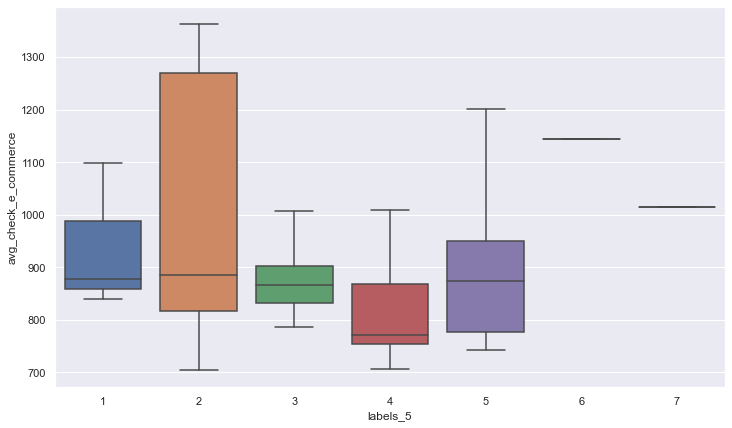

In [205]:
measures = 1
print(dict_measures[measures][1])
sns.boxplot(x="labels_5", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Доля Ecom в покупках клиентов в денежном выражении, %


<AxesSubplot:xlabel='labels_5', ylabel='e_com_share_value_percent'>

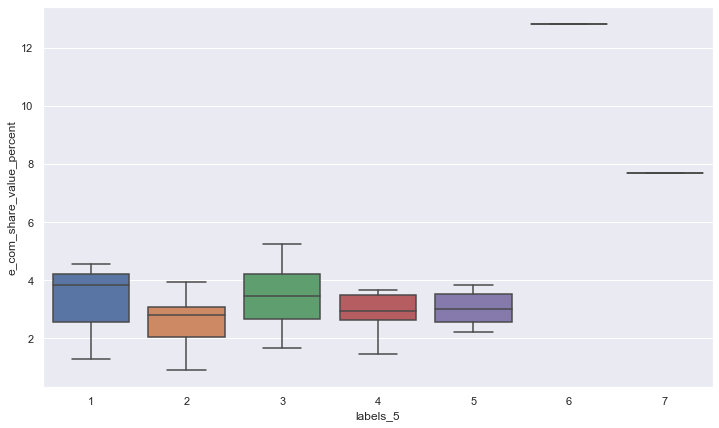

In [206]:
measures = 2
print(dict_measures[measures][1])
sns.boxplot(x="labels_5", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Средний чек с НДС в ЛО, руб.


<AxesSubplot:xlabel='labels_5', ylabel='avg_check_lenta_online'>

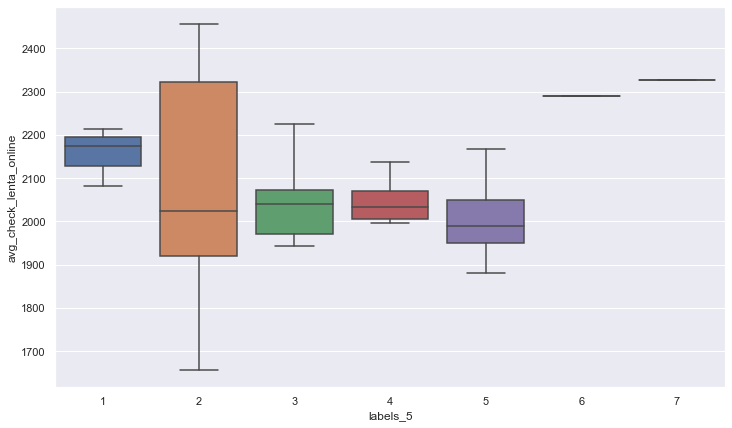

In [207]:
measures = 3
print(dict_measures[measures][1])
sns.boxplot(x="labels_5", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Доля бренда в покупках клиентов в денежном выражении, %


<AxesSubplot:xlabel='labels_5', ylabel='brand_share_value_percent'>

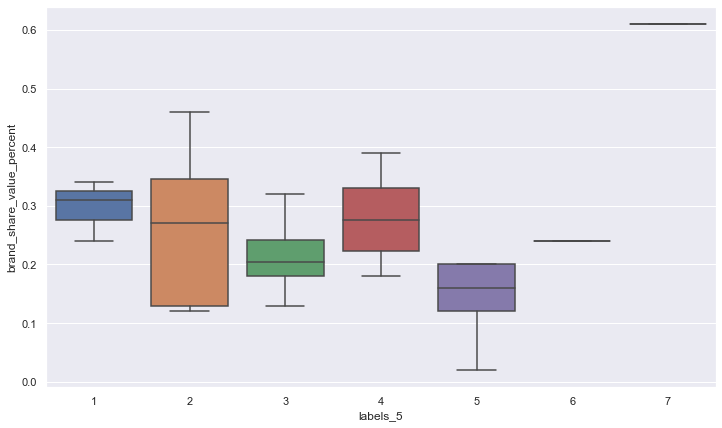

In [208]:
measures = 4
print(dict_measures[measures][1])
sns.boxplot(x="labels_5", y=dict_measures[measures][0], data=df_vis, showfliers = False)

NPS в ЛО


<AxesSubplot:xlabel='labels_5', ylabel='nps_lenta_online'>

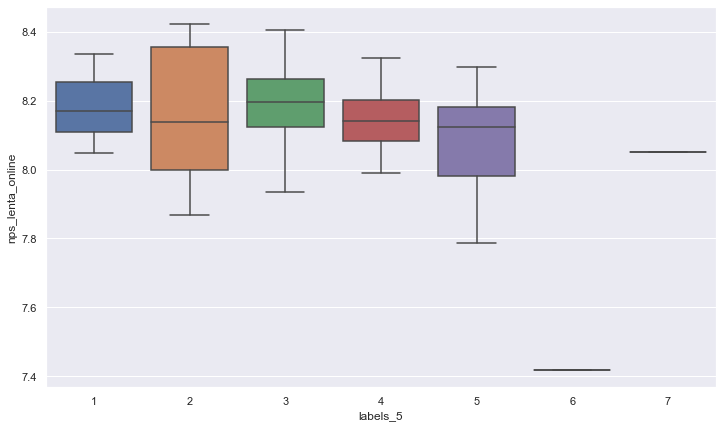

In [209]:
measures = 5
print(dict_measures[measures][1])
sns.boxplot(x="labels_5", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Аффинити индекс ЛО по отношению к доставке в целом


<AxesSubplot:xlabel='labels_5', ylabel='affinity_index_lo'>

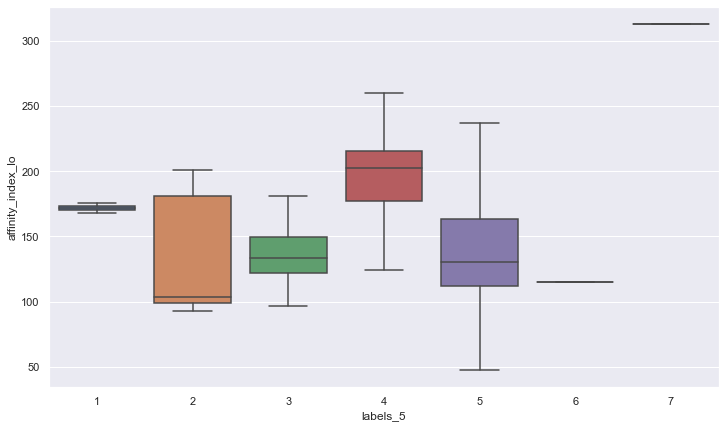

In [210]:
measures = 6
print(dict_measures[measures][1])
sns.boxplot(x="labels_5", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Аффинити индекс доставки в регионе


<AxesSubplot:xlabel='labels_5', ylabel='affinity_index_delivery'>

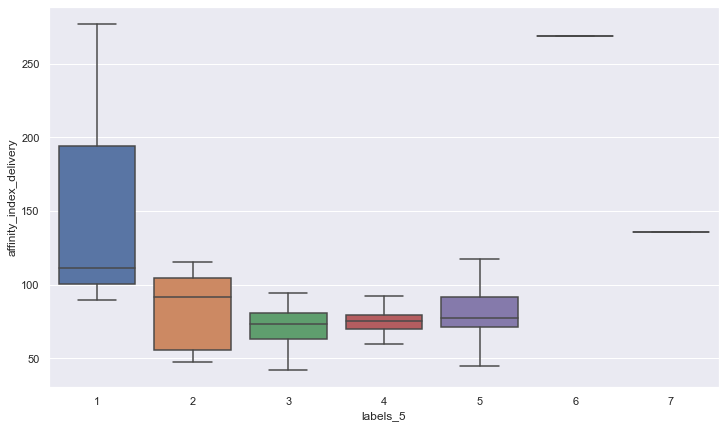

In [211]:
measures = 7
print(dict_measures[measures][1])
sns.boxplot(x="labels_5", y=dict_measures[measures][0], data=df_vis, showfliers = False)

In [212]:
clasterisation_regional_centers.to_excel('clasterisation_regional_centers.xlsx')

In [188]:
clasterisation_regional_centers.groupby('labels_5')['buyers_lenta_online'].sum()

labels_5
1    127778.0
2    183632.0
3    111746.5
4    133522.0
5    105716.0
6    170085.0
Name: buyers_lenta_online, dtype: float64